# **Part 1**

# Load of the Libraries and dataset


In [1]:
import pandas as pd

df = pd.read_csv("wine-missing.csv")

df.head()


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,unknown,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,unknown,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,unknown,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [2]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


**Creation of Histograms**

In [3]:
print(df.columns)

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')


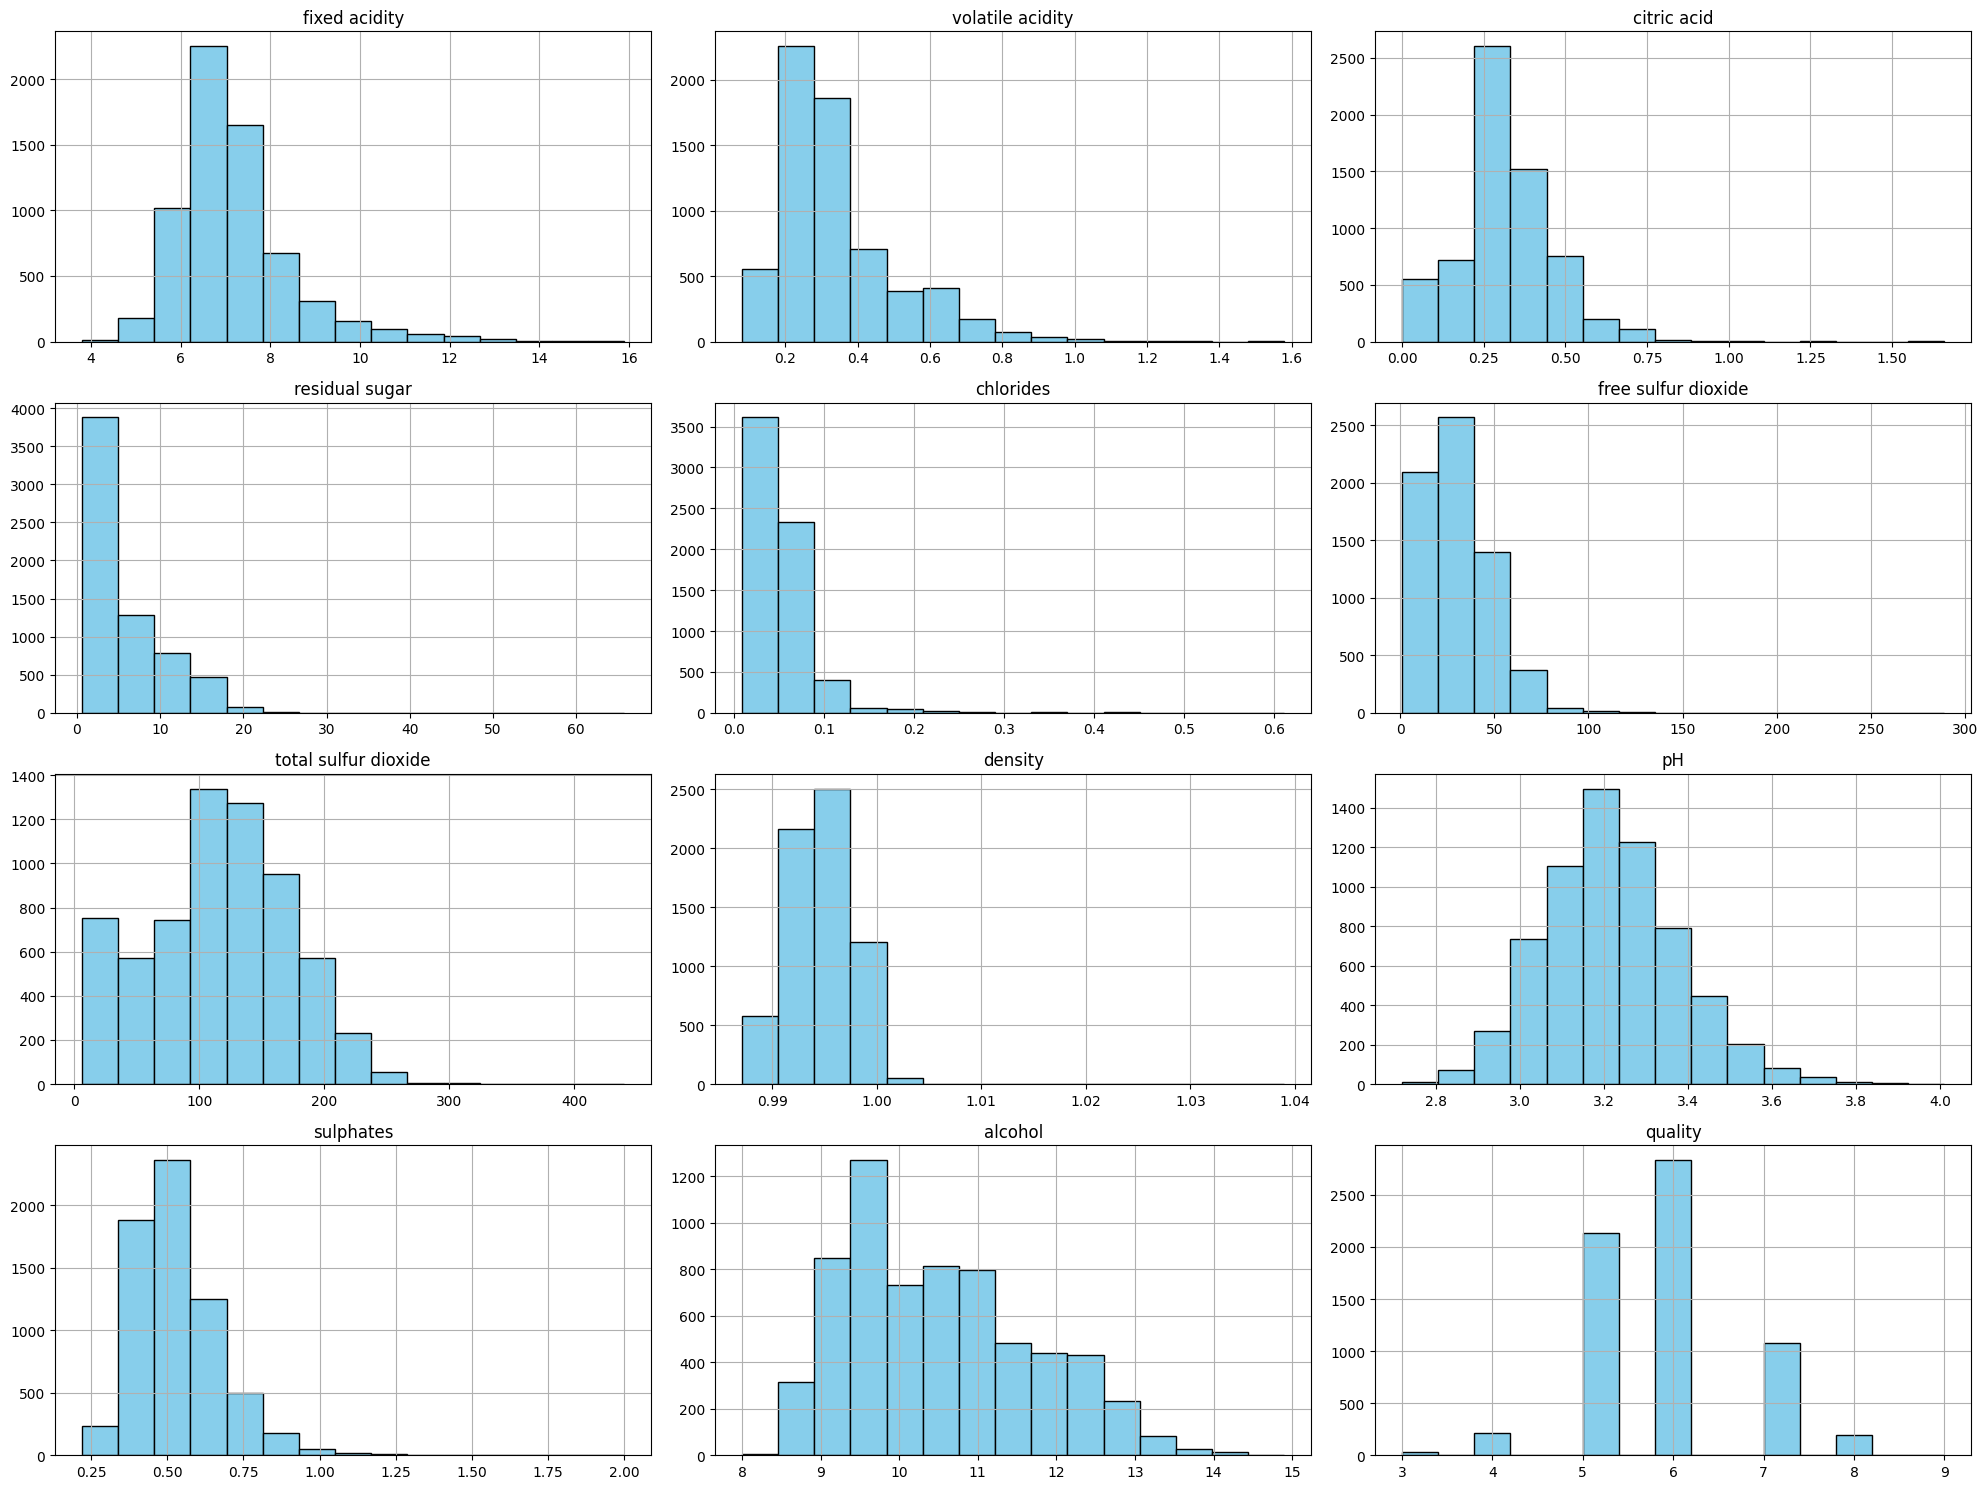

In [4]:
import matplotlib.pyplot as plt

numeric_features = ['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality']

df[numeric_features].hist(bins=15, figsize=(20,15), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

# Creation of the Bar Plot for the Type

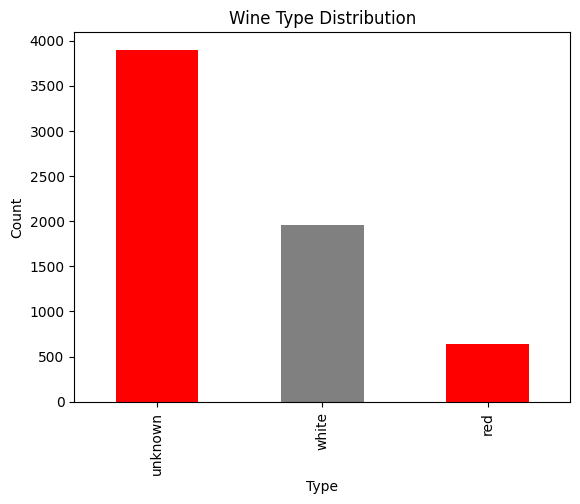

In [5]:
type_counts = df['type'].value_counts()

type_counts.plot(kind='bar', color=['red', 'gray'])
plt.title("Wine Type Distribution")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

# 2. Encode wine types

In [6]:
import numpy as np

type_mapping = {'white':0, 'red':1, 'unknown':2}
df['type_encoded'] = df['type'].fillna('unknown').map(type_mapping)

# Creation of numpy arrays

In [7]:
x = df.drop(columns=['type', 'type_encoded']).to_numpy()

y = df['type_encoded'].to_numpy()

print("x shape:", x.shape)
print("y shape:", y.shape)

x shape: (6497, 12)
y shape: (6497,)


# 3. The creation of the 2 Datasets

In [8]:
known_mask = df['type_encoded'] != 2
unknown_mask = df['type_encoded'] == 2

x_known = x[known_mask]
y_known = y[known_mask]
x_unknown = x[unknown_mask]

print("x_known shape:", x_known.shape)
print("y_known shape:", y_known.shape)
print("x_unknown shape:", x_unknown.shape)

x_known shape: (2599, 12)
y_known shape: (2599,)
x_unknown shape: (3898, 12)


# 4. Split Dataset to Train and Test

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x_known,
    y_known,
    test_size=0.3,
    random_state=42,
    stratify=y_known)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (1819, 12)
x_test shape: (780, 12)
y_train shape: (1819,)
y_test shape: (780,)


# 5. Train Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

Prediction

In [11]:
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

Metrics

In [12]:
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)


test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)

print("TRAIN SET METRICS")
print(f"Accuracy: {train_accuracy:.3f}, F1-score: {train_f1:.3f}, Precision: {train_precision:.3f}, Recall: {train_recall:.3f}\n")

print("TEST SET METRICS")
print(f"Accuracy: {test_accuracy:.3f}, F1-score: {test_f1:.3f}, Precision: {test_precision:.3f}, Recall: {test_recall:.3f}")

TRAIN SET METRICS
Accuracy: 0.999, F1-score: 0.999, Precision: 0.998, Recall: 1.000

TEST SET METRICS
Accuracy: 0.999, F1-score: 0.997, Precision: 0.995, Recall: 1.000


I believe that the F1 metric is the most representative for this dataset because the data is imbalanced. That is, some appear more often than others, and in this case, the accuracy is not reliable. This is because the model will always predict the most frequent class and get a high score without actually predicting correctly.

# 6. Train Random Forest with class_weight=’balanced’

In [13]:
rf_balanced = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_balanced.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

Prediction

In [14]:
y_train_pred_bal = rf_balanced.predict(x_train)
y_test_pred_bal = rf_balanced.predict(x_test)

Metrics

In [15]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


train_accuracy_bal = accuracy_score(y_train, y_train_pred_bal)
train_f1_bal = f1_score(y_train, y_train_pred_bal)
train_precision_bal = precision_score(y_train, y_train_pred_bal)
train_recall_bal = recall_score(y_train, y_train_pred_bal)


test_accuracy_bal = accuracy_score(y_test, y_test_pred_bal)
test_f1_bal = f1_score(y_test, y_test_pred_bal)
test_precision_bal = precision_score(y_test, y_test_pred_bal)
test_recall_bal = recall_score(y_test, y_test_pred_bal)

print("TRAIN SET METRICS (Balanced)")
print(f"Accuracy: {train_accuracy_bal:.3f}, F1-score: {train_f1_bal:.3f}, Precision: {train_precision_bal:.3f}, Recall: {train_recall_bal:.3f}\n")

print("TEST SET METRICS (Balanced)")
print(f"Accuracy: {test_accuracy_bal:.3f}, F1-score: {test_f1_bal:.3f}, Precision: {test_precision_bal:.3f}, Recall: {test_recall_bal:.3f}")

TRAIN SET METRICS (Balanced)
Accuracy: 0.999, F1-score: 0.999, Precision: 0.998, Recall: 1.000

TEST SET METRICS (Balanced)
Accuracy: 0.995, F1-score: 0.990, Precision: 0.995, Recall: 0.984


The parameter class_weight='balanced' in Random Forest gives higher weight to the less frequent classes.This is useful when the dataset is imbalanced, because without this parameter the model tends to predict the majority class more often. Just like I said further up.

# 7. The prediction of probabilities for unknown samples

In [16]:
y_unknown_proba = rf_balanced.predict_proba(x_unknown)
print(y_unknown_proba[:5])

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


# 8. Creation of labels for unknowwn samples

In [17]:
y_unknown_pred = np.array(['unknown'] * len(x_unknown))

red_proba = y_unknown_proba[:, 1]


y_unknown_pred[red_proba > 0.65] = 'red'
y_unknown_pred[red_proba < 0.35] = 'white'

print(y_unknown_pred[:10])

['white' 'white' 'white' 'white' 'white' 'white' 'white' 'white' 'white'
 'white']


# 9. First filtering of the data

In [18]:
mask_assigned = y_unknown_pred != 'unknown'
x_new = x_unknown[mask_assigned]
y_new = y_unknown_pred[mask_assigned]

type_mapping = {'white':0, 'red':1}
y_new_encoded = np.array([type_mapping[label] for label in y_new])


Combination with train set

In [19]:
x_train_aug = np.vstack([x_train, x_new])
y_train_aug = np.hstack([y_train, y_new_encoded])

print("Augmented x_train shape:", x_train_aug.shape)
print("Augmented y_train shape:", y_train_aug.shape)

Augmented x_train shape: (5666, 12)
Augmented y_train shape: (5666,)


Retrain of the model

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_final = RandomForestClassifier(random_state=42)
rf_final.fit(x_train_aug, y_train_aug)

RandomForestClassifier(random_state=42)

# 10. Repetition from 6-9

In [21]:
red_threshold = 0.65
white_threshold = 0.35

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

x_remaining_unknown = x_unknown.copy()
y_remaining_unknown_pred = np.array(['unknown'] * len(x_remaining_unknown))

x_train_iter = x_train.copy()
y_train_iter = y_train.copy()

iteration = 0

while True:
    iteration += 1
    print(f"\nIteration {iteration}")


    rf_iter = RandomForestClassifier(random_state=42, class_weight='balanced')
    rf_iter.fit(x_train_iter, y_train_iter)

    y_unknown_proba_iter = rf_iter.predict_proba(x_remaining_unknown)
    red_proba = y_unknown_proba_iter[:, 1]


    high_conf_mask = (red_proba > red_threshold) | (red_proba < white_threshold)


    if np.sum(high_conf_mask) == 0:
        print("No more high-confidence predictions. Stopping iteration.")
        break


    new_labels = np.array(['unknown'] * len(x_remaining_unknown))
    new_labels[red_proba > red_threshold] = 'red'
    new_labels[red_proba < white_threshold] = 'white'


    x_new = x_remaining_unknown[high_conf_mask]
    y_new = new_labels[high_conf_mask]


    type_mapping = {'white':0, 'red':1}
    y_new_encoded = np.array([type_mapping[label] for label in y_new])


    x_train_iter = np.vstack([x_train_iter, x_new])
    y_train_iter = np.hstack([y_train_iter, y_new_encoded])


    x_remaining_unknown = x_remaining_unknown[~high_conf_mask]
    y_remaining_unknown_pred = y_remaining_unknown_pred[~high_conf_mask]

    print(f"Newly labeled samples this iteration: {len(x_new)}")


y_test_pred_final_iter = rf_iter.predict(x_test)
test_accuracy_final_iter = accuracy_score(y_test, y_test_pred_final_iter)

print(f"\nFinal Test Accuracy after iterative labeling: {test_accuracy_final_iter:.3f}")


Iteration 1
Newly labeled samples this iteration: 3847

Iteration 2
Newly labeled samples this iteration: 23

Iteration 3
Newly labeled samples this iteration: 2

Iteration 4
Newly labeled samples this iteration: 5

Iteration 5
Newly labeled samples this iteration: 1

Iteration 6
No more high-confidence predictions. Stopping iteration.

Final Test Accuracy after iterative labeling: 0.996


# **Part 2**

# 1. Loading of the dataset

In [22]:
import pandas as pd

df_full = pd.read_csv("wine-full.csv")

df_full.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Score

In [23]:
quality_counts = df_full['quality'].value_counts().sort_index()
print(quality_counts)

quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: count, dtype: int64


Plot

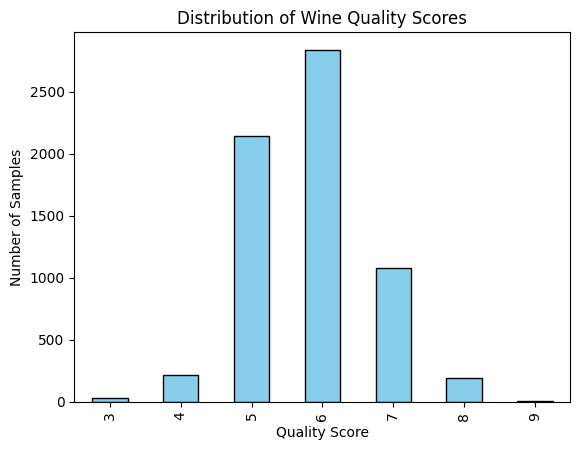

In [24]:
import matplotlib.pyplot as plt

quality_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribution of Wine Quality Scores")
plt.xlabel("Quality Score")
plt.ylabel("Number of Samples")
plt.show()

I see that the prices do not appear with the same frequency. And that means that the total is not balanced. We have an imbalance because some prices are very high.

# 2. What is the best type of wine?

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

df_full['type'] = df_full['type'].fillna('unknown')

mean_quality = df_full.groupby('type')['quality'].mean()
print(mean_quality)

type
red      5.636023
white    5.877909
Name: quality, dtype: float64


# Plot per wine type

/tmp/ipython-input-1124712200.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='quality', data=df_full, palette=['gray','red'])


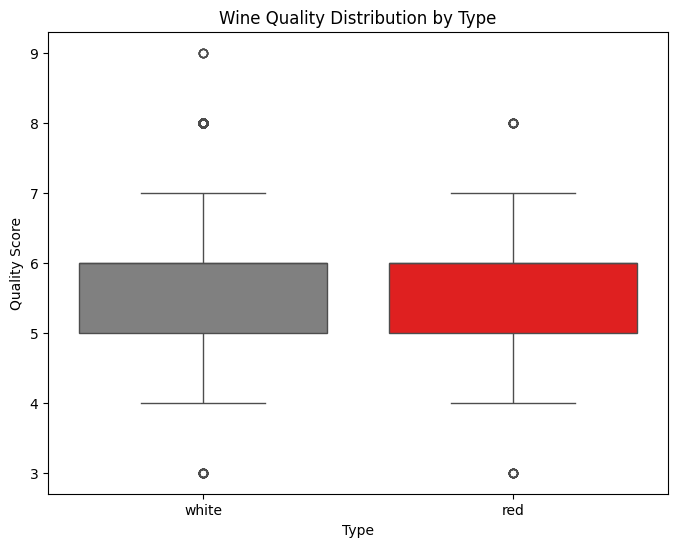

In [26]:
plt.figure(figsize=(8,6))
sns.boxplot(x='type', y='quality', data=df_full, palette=['gray','red'])
plt.title("Wine Quality Distribution by Type")
plt.xlabel("Type")
plt.ylabel("Quality Score")
plt.show()

# Histogram for each wine type

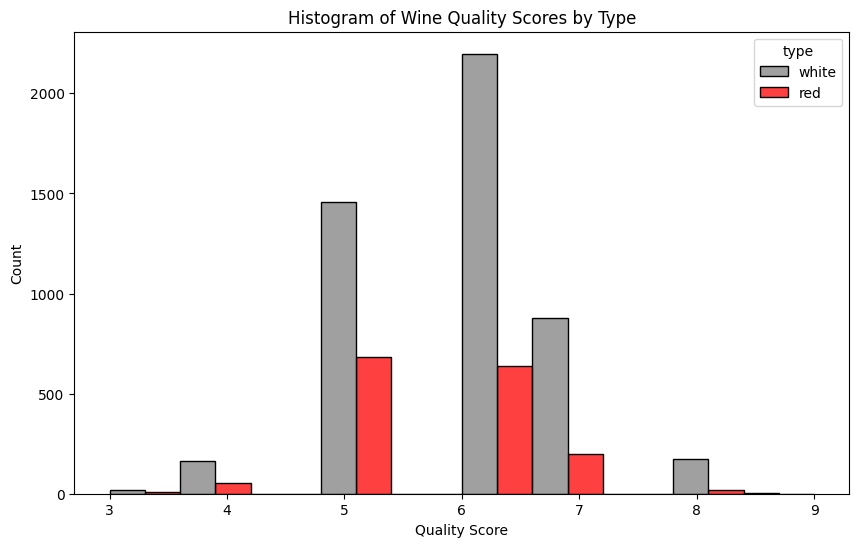

In [27]:
plt.figure(figsize=(10,6))
sns.histplot(data=df_full, x='quality', hue='type', multiple='dodge', palette=['gray','red'], bins=10)
plt.title("Histogram of Wine Quality Scores by Type")
plt.xlabel("Quality Score")
plt.ylabel("Count")
plt.show()

From the results, we see that both red and white wines have similar quality levels. Most quality values are around 5–6 for both groups.
White wines show slightly more variation and sometimes reach slightly higher scores. Red wines are a bit more compact around the center.
However, the difference is small. So, we cannot say that one type of wine is clearly better than the other. Both are on a similar quality level, with only minor differences

# 3.Sweet wine has better quality?

# Separations of the wines

In [28]:
dry_threshold = 4
sweet_threshold = 10

df_full['sweetness'] = 'medium'
df_full.loc[df_full['residual sugar'] <= dry_threshold, 'sweetness'] = 'dry'
df_full.loc[df_full['residual sugar'] >= sweet_threshold, 'sweetness'] = 'sweet'

print(df_full['sweetness'].value_counts())

sweetness
dry       3569
medium    1706
sweet     1222
Name: count, dtype: int64


Mean of the quality per category

In [29]:
mean_quality_sweetness = df_full.groupby('sweetness')['quality'].mean()
print(mean_quality_sweetness)

sweetness
dry       5.822079
medium    5.869285
sweet     5.736498
Name: quality, dtype: float64


Boxplot per quality

/tmp/ipython-input-3957371760.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sweetness', y='quality', data=df_full, order=['dry','medium','sweet'], palette=['gray','blue','orange'])


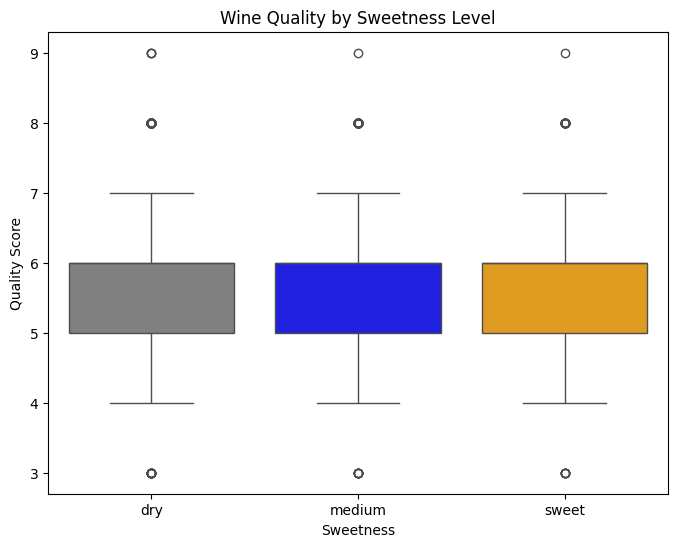

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.boxplot(x='sweetness', y='quality', data=df_full, order=['dry','medium','sweet'], palette=['gray','blue','orange'])
plt.title("Wine Quality by Sweetness Level")
plt.xlabel("Sweetness")
plt.ylabel("Quality Score")
plt.show()

The results show that sweet wines do not clearly have higher quality than dry wines. The average quality values are very similar, and both groups are on almost the same level. Some sweet wines reach slightly higher scores, but the difference is small and not consistent.
Therefore, we cannot say that sweet wine has better quality than dry wine. The quality depends more on other factors, not only on sweetness.

# 4. Numpy arrays creation

In [31]:
import numpy as np

x = df_full.drop(columns=['quality']).to_numpy()

y = df_full['quality'].to_numpy()

print("x shape:", x.shape)
print("y shape:", y.shape)

x shape: (6497, 13)
y shape: (6497,)


Train test split

In [32]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.1, random_state=0
)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (5847, 13)
x_test shape: (650, 13)
y_train shape: (5847,)
y_test shape: (650,)


# 5. DecisionTreeRegressor training

In [33]:
from sklearn.preprocessing import LabelEncoder

df_numeric = df_full.copy()

le_type = LabelEncoder()
df_numeric['type_encoded'] = le_type.fit_transform(df_numeric['type'])

le_sweet = LabelEncoder()
df_numeric['sweetness_encoded'] = le_sweet.fit_transform(df_numeric['sweetness'])

x = df_numeric.drop(columns=['quality', 'type', 'sweetness']).to_numpy()
y = df_numeric['quality'].to_numpy()

Train - Test Split

In [34]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.1, random_state=0
)

Train of DecisionTreeRegressor

In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

dt_reg = DecisionTreeRegressor(random_state=0)
dt_reg.fit(x_train, y_train)

y_test_pred = dt_reg.predict(x_test)

mae_test = mean_absolute_error(y_test, y_test_pred)
print(f"Mean Absolute Error (MAE) on test set: {mae_test:.3f}")

Mean Absolute Error (MAE) on test set: 0.435


# 6. Confirm if the model is reliable

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np

mae_list = []

for seed in range(10):

    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=0.1, random_state=seed
    )


    dt_reg = DecisionTreeRegressor(random_state=0)
    dt_reg.fit(x_train, y_train)


    y_test_pred = dt_reg.predict(x_test)
    mae = mean_absolute_error(y_test, y_test_pred)
    mae_list.append(mae)


mae_mean = np.mean(mae_list)
mae_std = np.std(mae_list)

print(f"MAE for seeds 0-9: {mae_list}")
print(f"Mean MAE: {mae_mean:.3f}")
print(f"Standard Deviation MAE: {mae_std:.3f}")

MAE for seeds 0-9: [0.43538461538461537, 0.49538461538461537, 0.4123076923076923, 0.5061538461538462, 0.49538461538461537, 0.4307692307692308, 0.46923076923076923, 0.44153846153846155, 0.4169230769230769, 0.4876923076923077]
Mean MAE: 0.459
Standard Deviation MAE: 0.034


I think that the mean and the standard deviation help us be more certain about the model’s true expected error. With these two values, we know not only how much error the model makes, but also if we can the value of that error I think.

# 7. Train set and Train Validation split

In [37]:
from sklearn.model_selection import train_test_split

x_train_sub, x_val, y_train_sub, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=0
)

print("Train subset shape:", x_train_sub.shape)
print("Validation shape:", x_val.shape)

Train subset shape: (4677, 13)
Validation shape: (1170, 13)


Fine Tunning

In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
import itertools

max_depth_values = [3, 5, 7]
min_samples_split_values = [2, 5, 10]
min_samples_leaf_values = [1, 2]


param_combinations = list(itertools.product(max_depth_values, min_samples_split_values, min_samples_leaf_values))
print("Total combinations:", len(param_combinations))

param_combinations = param_combinations[:15]


results = []

for max_depth, min_samples_split, min_samples_leaf in param_combinations:
    dt = DecisionTreeRegressor(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=0
    )
    dt.fit(x_train_sub, y_train_sub)

    y_train_pred = dt.predict(x_train_sub)
    y_val_pred = dt.predict(x_val)

    mae_train = mean_absolute_error(y_train_sub, y_train_pred)
    mae_val = mean_absolute_error(y_val, y_val_pred)

    results.append({
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'MAE_train': mae_train,
        'MAE_val': mae_val
    })


results_df = pd.DataFrame(results)
print(results_df)

Total combinations: 18
    max_depth  min_samples_split  min_samples_leaf  MAE_train   MAE_val
0           3                  2                 1   0.584908  0.609461
1           3                  2                 2   0.584908  0.609461
2           3                  5                 1   0.584908  0.609461
3           3                  5                 2   0.584908  0.609461
4           3                 10                 1   0.584908  0.609461
5           3                 10                 2   0.584908  0.609461
6           5                  2                 1   0.546056  0.596223
7           5                  2                 2   0.545167  0.595930
8           5                  5                 1   0.546056  0.596223
9           5                  5                 2   0.545167  0.595930
10          5                 10                 1   0.546056  0.596223
11          5                 10                 2   0.545167  0.595930
12          7                  2         

8. I think that the validation set is more reliable for choosing hyperparameters, because the training set is used to teach the model. I we choose the training set we may choose settings that fit the training data too well but do not generalize to new data. The model hasn't seen the validation data so it is more reliable.

9. Cross validation

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2]
}


dt = DecisionTreeRegressor(random_state=0)

grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=10,
    n_jobs=-1,
    verbose=1
)


grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_absolute_error', verbose=1)

In [40]:
best_params = grid_search.best_params_
print("Best parameters:", best_params)

best_score = -grid_search.best_score_
print(f"Best MAE (CV): {best_score:.3f}")

Best parameters: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best MAE (CV): 0.556


# 10. MAE in the Test Set

In [42]:
best_model = grid_search.best_estimator_

y_test_pred = best_model.predict(x_test)

mae_test = mean_absolute_error(y_test, y_test_pred)
print(f"Test MAE of best model: {mae_test:.3f}")

Test MAE of best model: 0.542
